In [1]:
# Vamos a realizar una prueba solo son la prediccion de latitudes
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2
import sys

sys.path.append('../')
from Utils import utils_nn as utlnn
#Cargamos el Dataset
file_path = "../dataset/dataset-with-coord-cartesian.xlsx"

df = pd.read_excel(file_path)

In [2]:
x_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc [Mhz]', 'elevation', 
    'azimuth', 'year', 'mmdd', 'hour']
x_df =df[x_columns]
out_x_coord = [f'x_{i}' for i in range(1,101)]
y_x_coord=df[out_x_coord]

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y_x_coord,test_size=0.2,random_state=42)


In [67]:
l2_reg = 0.00
inputs = Input(shape=(9,))
encoded = Dense(9, activation='relu',kernel_regularizer=l2(l2_reg))(inputs)  # Compresión 8 V3 16 n 
decoded = Dense(16, activation='relu',kernel_regularizer=l2(l2_reg))(encoded) #V3
encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
# encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
# encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(80, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(90, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)

decoded = Dense(100, activation='linear',kernel_regularizer=l2(l2_reg), name = 'latitudes_output')(encoded)  # Reconstrucción a 100 puntos

autoencoder_x = Model(inputs, decoded)
autoencoder_x.compile(optimizer = 'adam', loss='mse')
autoencoder_x.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latitudes_output (Dense)        │ (None, 100)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112 (94.19 KB)

 Trainable params: 24,112 (94.19 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = autoencoder_x.fit(x_train,y_train,
                          epochs=400,
                          batch_size=100, 
                          validation_split = 0.2) 

Epoch 1/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4815.9307 - val_loss: 1687.7135
Epoch 2/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1593.6615 - val_loss: 1573.2770
Epoch 3/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1492.1166 - val_loss: 1545.9336
Epoch 4/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1487.1824 - val_loss: 1528.2560
Epoch 5/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1462.6846 - val_loss: 1503.9690
Epoch 6/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1499.3531 - val_loss: 1464.6984
Epoch 7/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1434.6331 - val_loss: 1421.9064
Epoch 8/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1383.6709 - val_loss: 1285.9548
Epoch 9/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1262.8123 - val_loss: 1120.9779
Epoch 10/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1111.0874 - val_loss: 930.4301
Epoch 11/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 888.3447 - val_loss: 881.1868

In [69]:
loss = autoencoder_x.evaluate(x_test, y_test)
print(f'Pérdida en datos de Test: {loss}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.2478
Pérdida en datos de Test: 48.42693328857422


In [88]:
idx = 99 #Elegir una muestra para comparar

# Predicción de una muestra 
y_pred = autoencoder_x.predict(np.expand_dims(x_test.iloc[idx], axis=0))
###############################################
y_true = y_test.iloc[idx] # Se obtine Algo de tipo Serie
y_true=y_true.to_numpy() # Transform a Numpy array
y_pred = y_pred.flatten() # [[...,...,...,....,]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


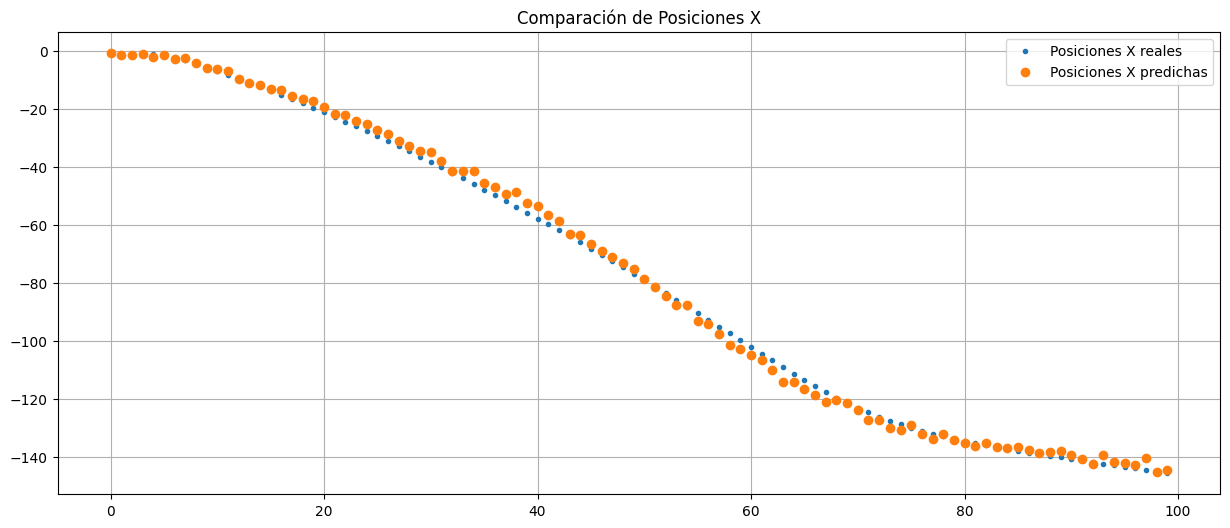

In [89]:
##Graficamos 
# Pos x
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Posiciones X reales', linestyle='None', marker='.')
plt.plot(y_pred, label='Posiciones X predichas', linestyle = 'None',marker='o')
# plt.ylim(-35,-50) ##(-60,-30)
plt.title('Comparación de Posiciones X')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
ecm, recm = utlnn.calculate_ECM_RECM(y_true,y_pred)
print(f'Error Cuadratico Medio:{ecm}, Raiz del Error Cuadratico Medio:{recm} [Km]')


Error Cuadratico Medio:1.4037065381063472, Raiz del Error Cuadratico Medio:1.1847812195111582 [Km]


In [82]:
save_model = False

if save_model == True:
  autoencoder_x.save('../modelos_entrenamiento/modelos_x/mod_x_400_100.keras')